In [23]:
import pandas as pd 
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

## Read the sport category

In [6]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_category_without_description_column_metadata.parquet')

In [8]:
eurocup_df = filtered_df_sport_category[
    filtered_df_sport_category['title'].str.contains('eurocup', case=False, na=False) |
    filtered_df_sport_category['tags'].str.contains('eurocup', case=False, na=False)
]
eurocup_df

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
24692,Sports,UCrrgwgOKqOWlvQaxC58fAbg,2019-10-31 08:45:50.994505,4.0,exV4Uz6ukMQ,231,304.0,"highlight,basketball,ball,hoop mixtape,nba,nbd...","Brandon Armstrong's Madrid, Spain Summer Leagu...",2013-07-02 00:00:00,55733.0
147735,Sports,UCqIrUmlIiJc8W2PXOra5xcA,2019-11-02 18:07:42.911117,282.0,ULK_-4hBFoY,683,4088.0,"cristiano ronaldo,vs,spain,espanha,espana,port...",Cristiano Ronaldo Vs Spain (EURO 2012) HD 720p...,2017-06-13 00:00:00,548512.0
681095,Sports,UCjfGVaxOM4EAACkmAYaH6dQ,2019-11-20 07:02:50.453429,90.0,EjrMQX8Kf2k,314,2046.0,"Toni kukoc,hall of fame,assists,top 10,michael...",[HD] Toni Kukoc - TOP 10 PLAYS Ⓒ 2017 [Hall of...,2017-05-08 00:00:00,448888.0
681138,Sports,UCjfGVaxOM4EAACkmAYaH6dQ,2019-11-20 07:02:21.795181,9.0,9t-nX5c-_uk,235,402.0,"Arvydas Sabonis,lithuania,finals,croatia,ussr,...",[HD] Arvydas Sabonis ~ No Easy Way Out,2013-08-24 00:00:00,120752.0
708485,Sports,UCj6-3fHx-aOY5U1T46ALrzQ,2019-11-17 16:05:27.492681,0.0,gYUTcfs6x-A,78,2.0,"decathlon,euro,eurocup,2012,football,kipsta",DECATHLON Spot Eurocup 2012.,2012-06-10 00:00:00,771.0
...,...,...,...,...,...,...,...,...,...,...,...
4268741,Sports,UCtInrnU3QbWqFGsdKT1GZtg,2019-11-14 08:09:26.958095,0.0,TcZlg_eGqYs,6981,16.0,"fiba,Basketball,association,2015,2016,live,com...",ESBVA-LM (FRA) v Basket Landes (FRA) - Full Ga...,2016-03-22 00:00:00,4508.0
4271496,Sports,UCtInrnU3QbWqFGsdKT1GZtg,2019-11-14 08:10:11.097153,1.0,EVMfr6gjjJo,7011,11.0,"fiba,Basketball,association,2014–15 EuroCup Wo...",Castors Braine (BEL) v ESBVA-LM (FRA) – Full G...,2015-03-27 00:00:00,2678.0
4271497,Sports,UCtInrnU3QbWqFGsdKT1GZtg,2019-11-14 08:10:11.622393,1.0,qU4mEOWYcXU,121,10.0,"fiba,Basketball,association,EuroCup Women (Spo...",Castors Braine (BEL) v ESBVA-LM (FRA) – Highli...,2015-03-27 00:00:00,2722.0
4271498,Sports,UCtInrnU3QbWqFGsdKT1GZtg,2019-11-14 08:10:12.208761,1.0,bpJHb1f0ZAE,7604,4.0,"fiba,Basketball,association,ESB Villeneuve-d'A...",ESBVA-LM (FRA) v Castors Braine (BEL) – Full G...,2015-03-26 00:00:00,1763.0


In [9]:
# Convert 'upload_date' to datetime
eurocup_df['upload_date'] = pd.to_datetime(eurocup_df['upload_date'])

# Extract year, month, and day
eurocup_df['year'] = eurocup_df['upload_date'].dt.year
eurocup_df['month'] = eurocup_df['upload_date'].dt.month
eurocup_df['day'] = eurocup_df['upload_date'].dt.day

/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_56021/2114941374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurocup_df['upload_date'] = pd.to_datetime(eurocup_df['upload_date'])
/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_56021/2114941374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurocup_df['year'] = eurocup_df['upload_date'].dt.year
/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_56021/2114941374.py:6: SettingWithCopyWarning: 
A value is trying to be 

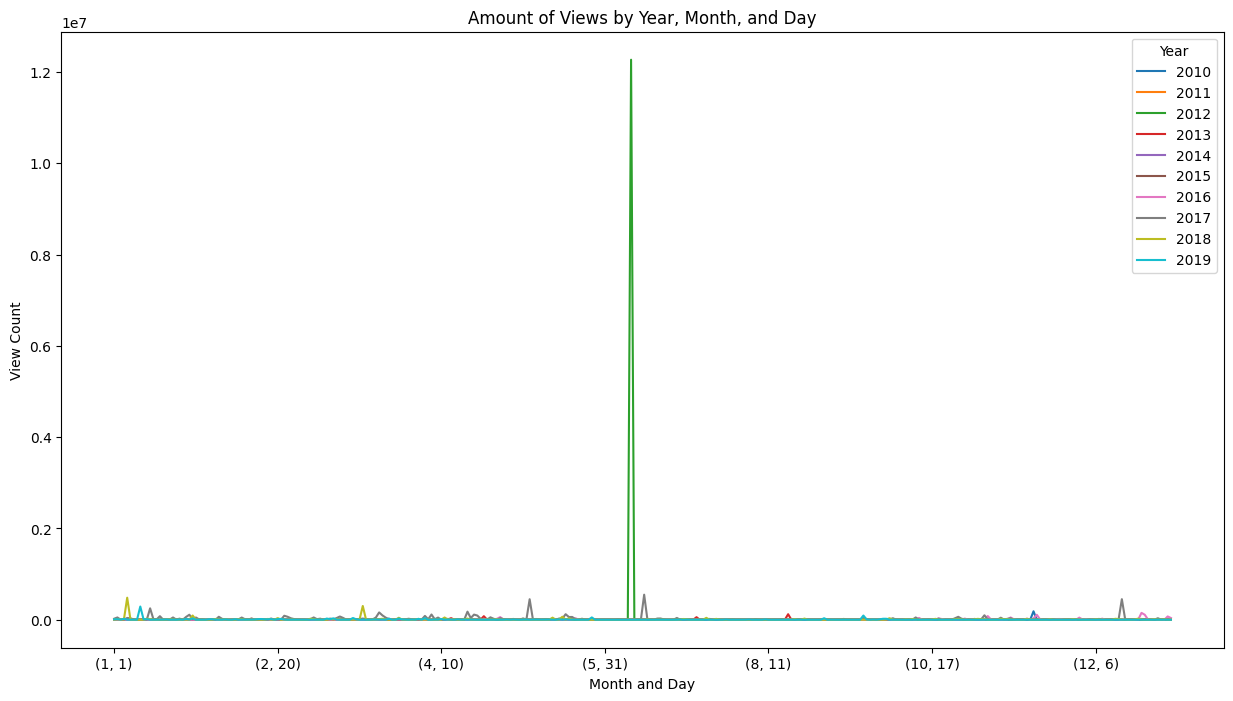

In [ ]:

# Group by year, month, and day and sum the view counts
grouped_df = eurocup_df.groupby(['year', 'month', 'day'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months/days as rows
pivot_df = grouped_df.pivot_table(index=['month', 'day'], columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

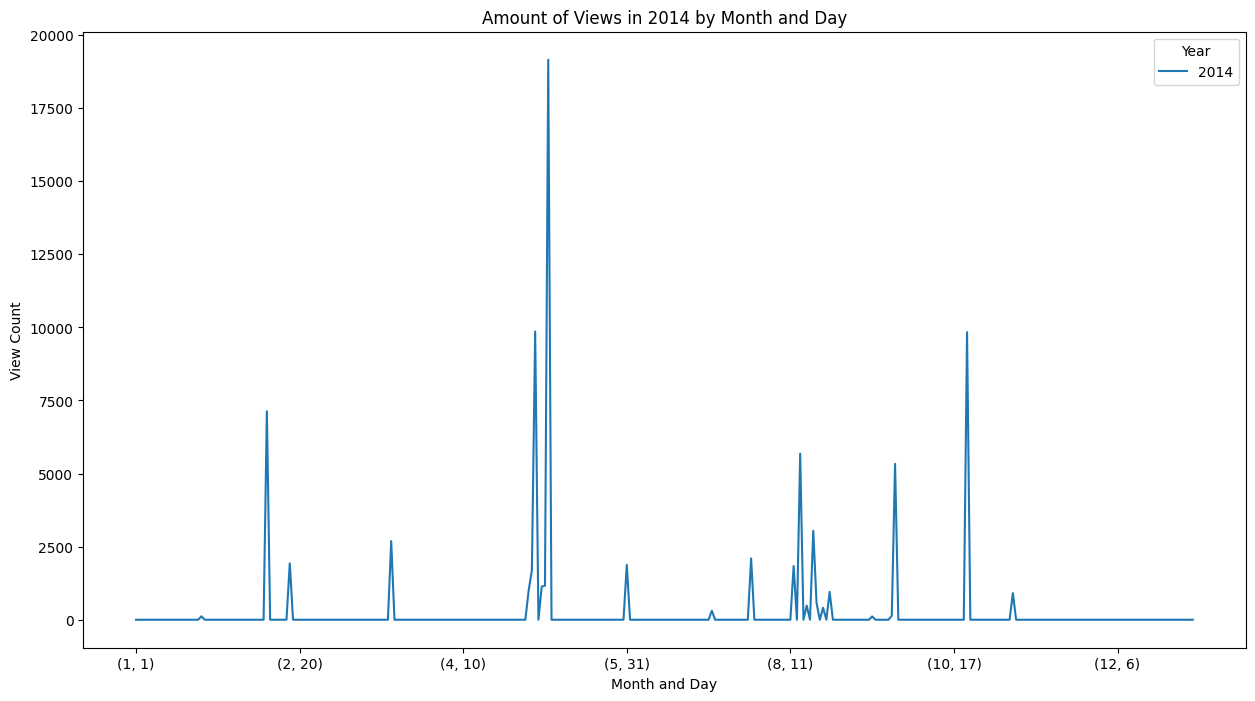

In [12]:
# Filter the pivot_df to include only the column for 2014
pivot_df_2014 = pivot_df[[2014]]

# Plot the data for 2014
pivot_df_2014.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views in 2014 by Month and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

## Read the filtered metadata by keywords

In [18]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_metadata(by_tags_and_title)_without_description_column_and_gaming_category.parquet')

In [21]:
keywords = ['football', 'soccer', 'fifa']

eurocup_df = filtered_df_sport_category[
    filtered_df_sport_category.apply(
        lambda row: 'eurocup' in row['title'].lower() or 'eurocup' in row['tags'].lower() and 
        (any(keyword in row['title'].lower() for keyword in keywords) or 
        any(keyword in row['tags'].lower() for keyword in keywords)), axis=1
    )
]
eurocup_df

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
index,,,,,,,,,,,
188671,Sports,UCqIrUmlIiJc8W2PXOra5xcA,2019-11-02 18:07:42.911117,282.0,ULK_-4hBFoY,683,4088.0,"cristiano ronaldo,vs,spain,espanha,espana,port...",Cristiano Ronaldo Vs Spain (EURO 2012) HD 720p...,2017-06-13 00:00:00,548512.0
220877,News & Politics,UCpwvZwUam-URkxB7g4USKpg,2019-10-31 12:46:40.134744,29.0,AzKzhh3wpCo,87,70.0,"RT,Spain Italy video,Spain Eurocup,Spain wins ...",Bravo La Roja! Spanish fans rejoice in Euro-20...,2012-07-02 00:00:00,7869.0
226748,Comedy,UCpsSadsgX_Qk9i6i_bJoUwQ,2019-11-01 11:28:56.317152,100.0,wtOgiMCQaXY,116,2900.0,"just for laughs gags,just for laughs,just for ...",Football Lands in Man's Coffin Prank! - Just F...,2016-06-19 00:00:00,208314.0
230280,Autos & Vehicles,UCpn6IctAyZPk1QoHUAAJUnQ,2019-10-30 09:21:11.811430,2.0,OovwpaWAljk,417,24.0,"ceramic watch,Rolex Watch,hublot soccer watch,...",Hublot Big Bang Unico UEFA Champions League Lu...,2016-06-27 00:00:00,3199.0
310113,People & Blogs,UCpDJ6VjJsGmQIR_auxpacvA,2019-11-08 17:31:44.094936,166.0,dYRVnebkq-U,767,5095.0,"G2,G2 Esports,Ocelote,Carlos Rodriguez,Eefje D...",Why I recorded myself crying when G2 won MSI,2019-05-25 00:00:00,100752.0
...,...,...,...,...,...,...,...,...,...,...,...
5465261,Sports,UCtInrnU3QbWqFGsdKT1GZtg,2019-11-14 08:09:26.958095,0.0,TcZlg_eGqYs,6981,16.0,"fiba,Basketball,association,2015,2016,live,com...",ESBVA-LM (FRA) v Basket Landes (FRA) - Full Ga...,2016-03-22 00:00:00,4508.0
5467992,Sports,UCtInrnU3QbWqFGsdKT1GZtg,2019-11-14 08:10:11.097153,1.0,EVMfr6gjjJo,7011,11.0,"fiba,Basketball,association,2014–15 EuroCup Wo...",Castors Braine (BEL) v ESBVA-LM (FRA) – Full G...,2015-03-27 00:00:00,2678.0
5467993,Sports,UCtInrnU3QbWqFGsdKT1GZtg,2019-11-14 08:10:11.622393,1.0,qU4mEOWYcXU,121,10.0,"fiba,Basketball,association,EuroCup Women (Spo...",Castors Braine (BEL) v ESBVA-LM (FRA) – Highli...,2015-03-27 00:00:00,2722.0


In [22]:
# Convert 'upload_date' to datetime
eurocup_df['upload_date'] = pd.to_datetime(eurocup_df['upload_date'])

# Extract year, month, and day
eurocup_df['year'] = eurocup_df['upload_date'].dt.year
eurocup_df['month'] = eurocup_df['upload_date'].dt.month
eurocup_df['day'] = eurocup_df['upload_date'].dt.day

/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_56021/2114941374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurocup_df['upload_date'] = pd.to_datetime(eurocup_df['upload_date'])
/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_56021/2114941374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurocup_df['year'] = eurocup_df['upload_date'].dt.year
/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_56021/2114941374.py:6: SettingWithCopyWarning: 
A value is trying to be 

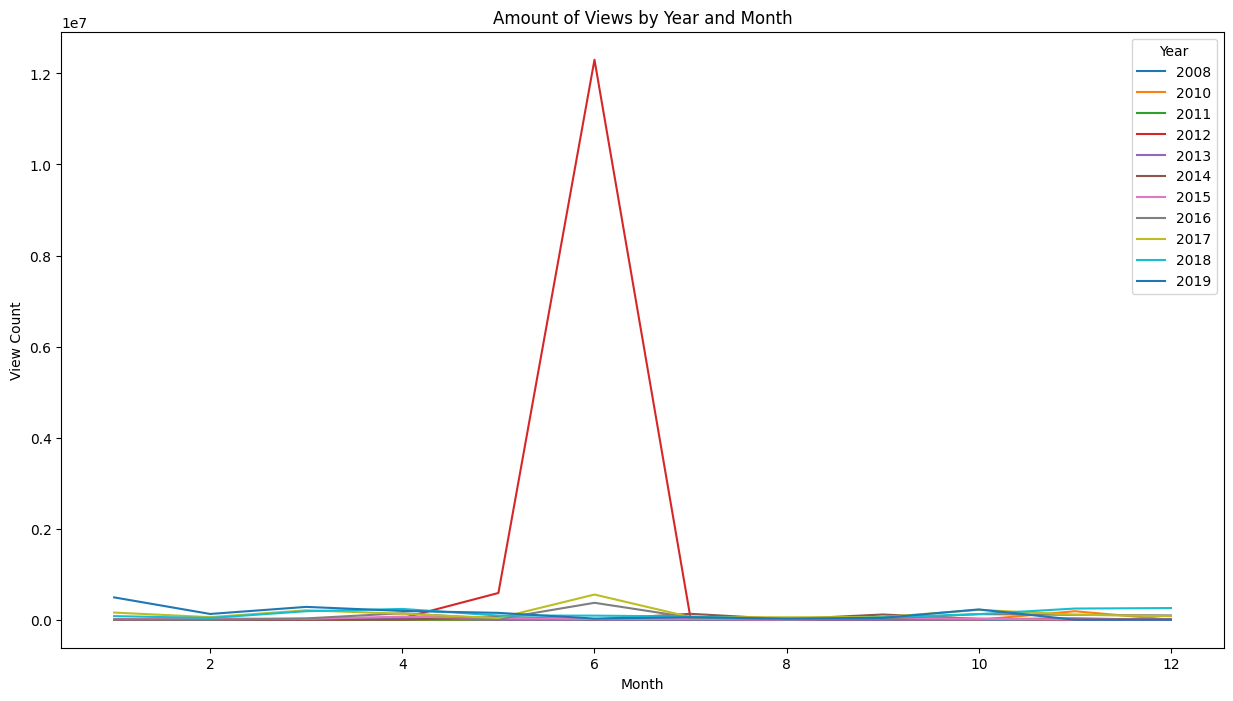

In [28]:
# Group by year and month and sum the view counts
grouped_df = eurocup_df.groupby(['year', 'month'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months as rows
pivot_df = grouped_df.pivot_table(index='month', columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year and Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

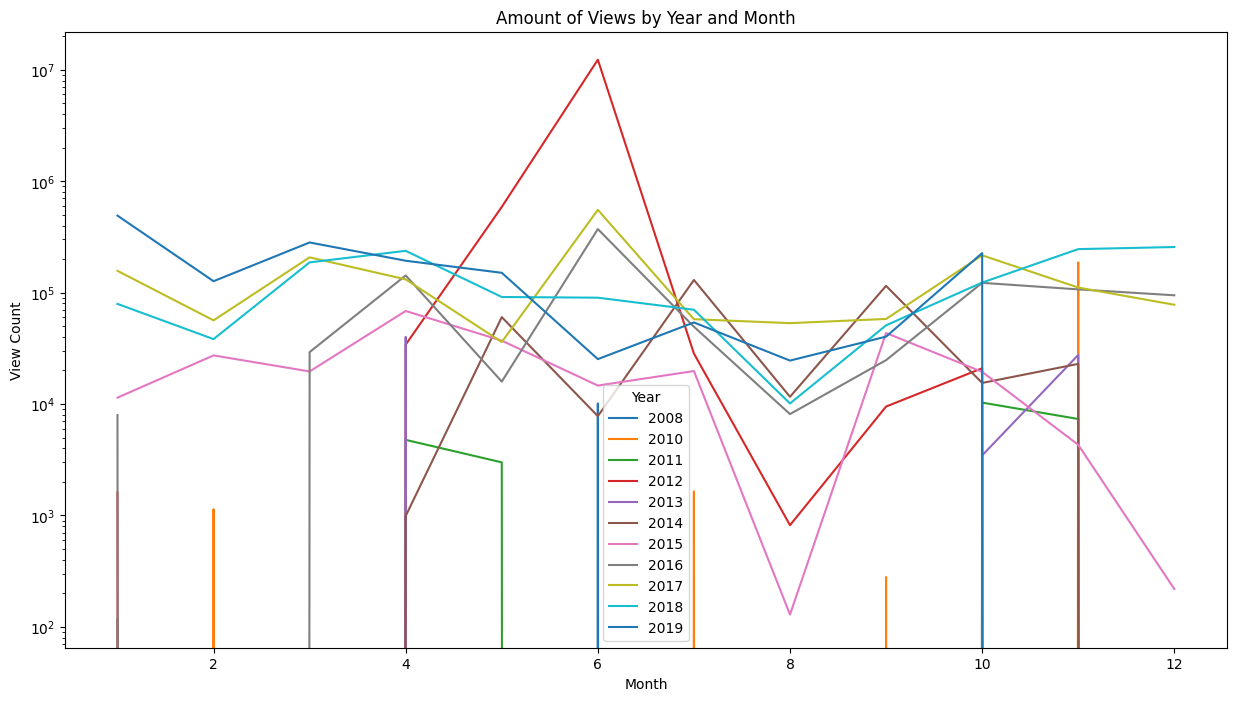

In [41]:
# Group by year and month and sum the view counts
grouped_df = eurocup_df.groupby(['year', 'month'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months as rows
pivot_df = grouped_df.pivot_table(index='month', columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year and Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.yscale('log')
plt.legend(title='Year')
plt.show()

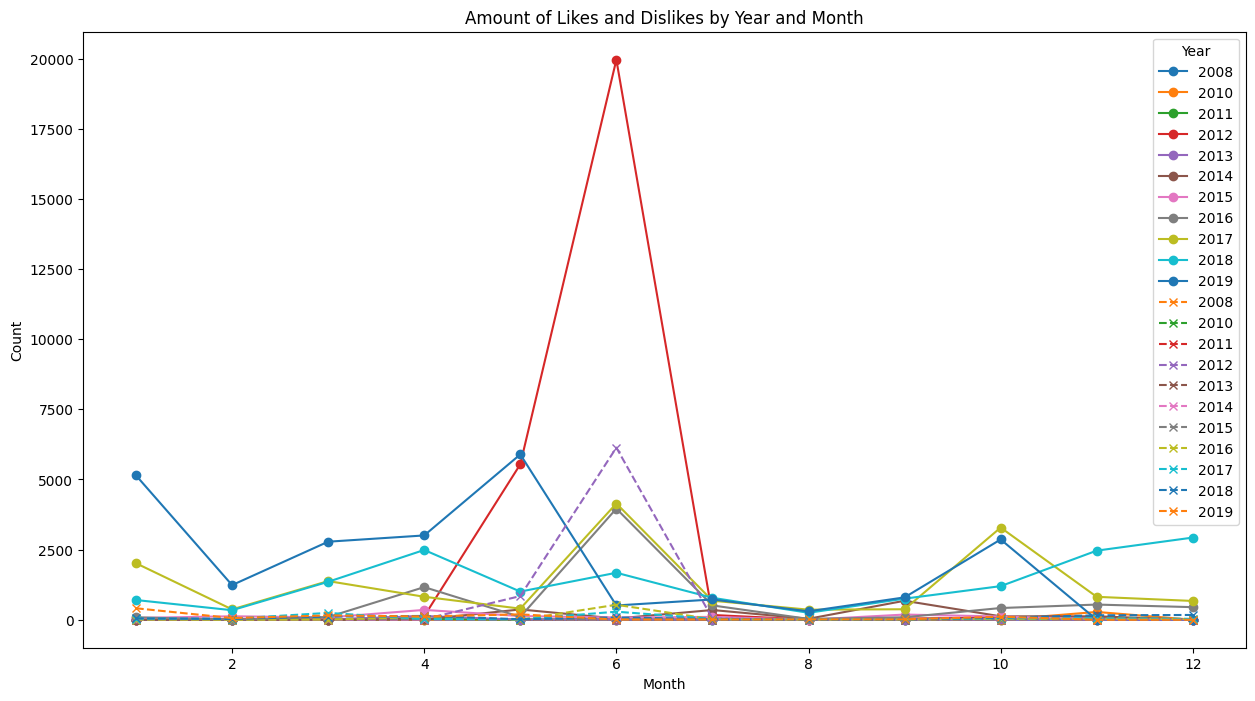

In [34]:
# Group by year and month and sum the like and dislike counts
grouped_likes_dislikes_df = eurocup_df.groupby(['year', 'month'])[['like_count', 'dislike_count']].sum().reset_index()

# Pivot the table to have years as columns and months as rows for likes
pivot_likes_df = grouped_likes_dislikes_df.pivot_table(index='month', columns='year', values='like_count', fill_value=0)

# Pivot the table to have years as columns and months as rows for dislikes
pivot_dislikes_df = grouped_likes_dislikes_df.pivot_table(index='month', columns='year', values='dislike_count', fill_value=0)

# Plot the data for likes and dislikes
fig, ax = plt.subplots(figsize=(15, 8))

pivot_likes_df.plot(kind='line', ax=ax, linestyle='-', marker='o')
pivot_dislikes_df.plot(kind='line', ax=ax, linestyle='--', marker='x')

plt.title('Amount of Likes and Dislikes by Year and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()


In [38]:
eurocup_df.sort_values(by='view_count', ascending=False).head(10)


,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month,day
index,,,,,,,,,,,,,,
1719416,Sports,UC_zPAGmpzpxkQTSrkWcMlyg,2019-10-31 09:17:17.985379,6120.0,r_gDDApY8LM,55,19866.0,"zain,euro,2012,eurocup,euro2012,soccer,footbal...",Lonely Sports - Zain,2012-06-09,12268095.0,2012,6,9
3262209,Howto & Style,UCKpNY0xYeGNN-uOHmQIE7Pg,2019-11-18 03:38:26.701359,843.0,fub0SbatCWg,64,5512.0,"Furious,poland,fitness,bodybuilding,beer,Pete,...",POLISH LANGUAGE LESSON #1 | Furious Pete Talks,2012-05-26,577618.0,2012,5,26
188671,Sports,UCqIrUmlIiJc8W2PXOra5xcA,2019-11-02 18:07:42.911117,282.0,ULK_-4hBFoY,683,4088.0,"cristiano ronaldo,vs,spain,espanha,espana,port...",Cristiano Ronaldo Vs Spain (EURO 2012) HD 720p...,2017-06-13,548512.0,2017,6,13
226748,Comedy,UCpsSadsgX_Qk9i6i_bJoUwQ,2019-11-01 11:28:56.317152,100.0,wtOgiMCQaXY,116,2900.0,"just for laughs gags,just for laughs,just for ...",Football Lands in Man's Coffin Prank! - Just F...,2016-06-19,208314.0,2016,6,19
4202837,Sports,UCC0jfic1m5dOIAbUvRnJd_w,2019-10-30 15:08:02.300451,9.0,4th1IxHgrFk,241,263.0,"Michael,Jordan,Paul,Pierce,celtics,finals,kevi...",Allen Iverson Debut 15pts Besiktas Cola Turka ...,2010-11-17,184944.0,2010,11,17
419836,News & Politics,UCo9oQdIk1MfcnzypG3UnURA,2019-11-11 23:06:03.888074,307.0,7RdW35TO_b8,81,341.0,"Icelandic Commentator Freaks Out,iceland comme...",Icelandic Commentator Freaks Out,2016-06-23,107608.0,2016,6,23
310113,People & Blogs,UCpDJ6VjJsGmQIR_auxpacvA,2019-11-08 17:31:44.094936,166.0,dYRVnebkq-U,767,5095.0,"G2,G2 Esports,Ocelote,Carlos Rodriguez,Eefje D...",Why I recorded myself crying when G2 won MSI,2019-05-25,100752.0,2019,5,25
2941728,Sports,UCwFIQ7wtJzYGFb2nZcVoNww,2019-11-21 01:11:52.862640,10.0,2KVQg6pBxxM,575,1633.0,"Lando,Norris,Racing,Battles,Defourney,Risky,ov...","Lando Norris vs Max Defourny Eurocup FR2 0, ...",2017-01-15,77533.0,2017,1,15
3786479,Autos & Vehicles,UCG8lMdGBGyGyahNbrwrp5jw,2019-11-03 20:20:55.340747,7.0,xfzXz8nOiK8,265,129.0,"Tractor (Product Category),Tractor Pulling,Cow...",4300 / 4500kg Modified - Eurocup / 5. DM Tract...,2014-07-26,75200.0,2014,7,26
